In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RK4:
    def __init__(self, initial1, initial2, h):
        # initial1: [x0, y0], initial2: [x0, y0'] (x0 must be same)
        self.x_value = initial1[0]
        self.y_value = initial1[1]
        self.z_value = initial2[1]
        self.h = h
        self.x_values = []
        self.y_values = []
        self.z_values = []

    def f1(self, x, y, z):
        return z

    def f2(self, x, y, z):
        return np.exp(x) + np.sin(x) - 5 * z - 6 * y

    def evaluate(self):
        x0 = self.x_value
        y0 = self.y_value
        z0 = self.z_value
        h = self.h

        k1 = h * self.f1(x0, y0, z0)
        l1 = h * self.f2(x0, y0, z0)

        k2 = h * self.f1(x0 + h/2, y0 + k1/2, z0 + l1/2)
        l2 = h * self.f2(x0 + h/2, y0 + k1/2, z0 + l1/2)

        k3 = h * self.f1(x0 + h/2, y0 + k2/2, z0 + l2/2)
        l3 = h * self.f2(x0 + h/2, y0 + k2/2, z0 + l2/2)

        k4 = h * self.f1(x0 + h, y0 + k3, z0 + l3)
        l4 = h * self.f2(x0 + h, y0 + k3, z0 + l3)

        delta_y = (k1 + 2*k2 + 2*k3 + k4) / 6
        delta_z = (l1 + 2*l2 + 2*l3 + l4) / 6

        return y0 + delta_y, z0 + delta_z

    def calculate(self, n=10):
        self.x_values = [self.x_value]
        self.y_values = [self.y_value]
        self.z_values = [self.z_value]
        for i in range(n):
            self.x_value += self.h
            self.y_value, self.z_value = self.evaluate()
            self.x_values.append(self.x_value)
            self.y_values.append(self.y_value)
            self.z_values.append(self.z_value)
        print("x:", np.round(self.x_values,3))
        print("y:", np.round(self.y_values,3))
        plt.plot(self.x_values, self.y_values, color='green', marker='o', label='RK4 y(x)')
        plt.title('RK4 Method for 2nd Order ODE')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
y: [1.    1.058 1.054 1.016 0.959 0.897 0.836 0.78  0.733 0.695 0.668 0.651
 0.643 0.644 0.655 0.673 0.7   0.734 0.775 0.824 0.88 ]


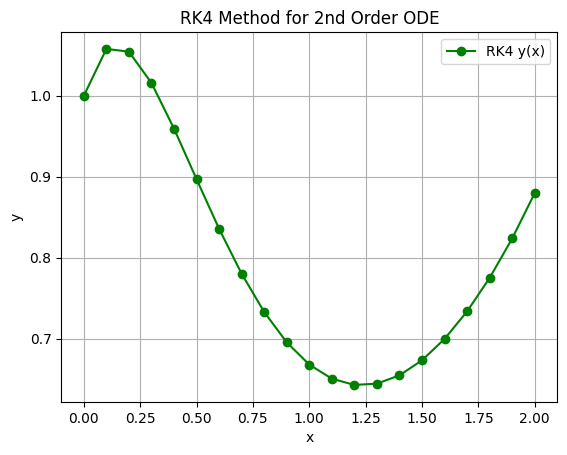

In [4]:
rk = RK4([0, 1], [0, 1], 0.1)
rk.calculate(n=20)